In [11]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('train.csv')
articles = df['Text']


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Category']
k = 2
knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
knn.fit(X, y)
test_df = pd.read_csv("test.csv")
test_articles = test_df['Text']
test_X = vectorizer.transform(test_articles).toarray()
test_y = test_df['Category'].to_numpy()
y_pred = knn.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")
k = 2



Accuracy: 0.9905660377358491


In [12]:
encoder = LabelEncoder()

encoded_categories = encoder.fit_transform(df['Category'])
len(encoded_categories) 

encoded_predictions = encoder.transform(y_pred)

Accuracy: 0.9716981132075472


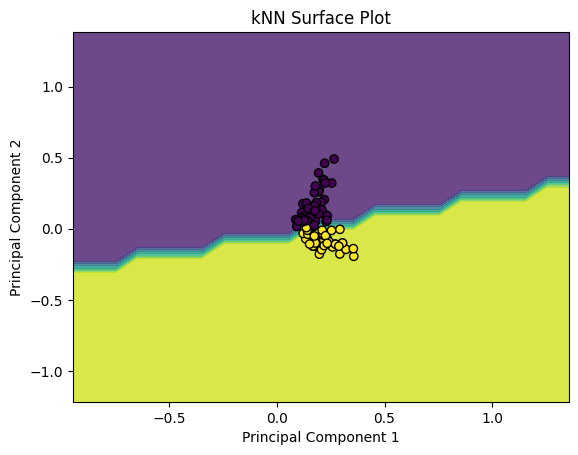

In [15]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import issparse
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
if issparse(X):
    svd = TruncatedSVD(n_components=2)
    X_train_reduced = svd.fit_transform(X)
    X_test_reduced = svd.transform(test_X)
else:
    pca = PCA(n_components=2)
    X_train_reduced = pca.fit_transform(X)
    X_test_reduced = pca.transform(test_X)


    

k = 100# Number of neighbors
distance_metric = 'euclidean'  # Distance metric
new_knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
new_knn.fit(X_train_reduced, encoded_categories)
# print(X_test_reduced)
new_knn.predict(X_test_reduced)
accuracy = accuracy_score(encoded_predictions, new_knn.predict(X_test_reduced))
print(f"Accuracy: {accuracy}")

# Generate grid points for surface plot
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = new_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the surface plot
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=encoded_predictions, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('kNN Surface Plot')
plt.show()

In [17]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

# replace the below by your data and model
k = 2
knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
knn.fit(X, y)
X_Train_embedded = TSNE(n_components=2).fit_transform(X)
print(X_Train_embedded.shape)
model = LogisticRegression().fit(X,y)
y_predicted = model.predict(X)
# replace the above by your data and model

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=y)
plt.show()


TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.